## Introduction to Natural Language Processing and Classical Language Models

<div style="display: flex; justify-content: flex-start; align-items: center;">
    <a href="https://colab.research.google.com/github/msfasha/307307-BI-Methods-LLMs/blob/main/lecture%20notes/1-introductino%20to%20NLP.ipynb" target="_blank">    
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height: 25px; margin-right: 20px;">
    </a>
</div>

### Learning Objectives

By the end of this lecture, students will be able to:
1. Understand the basic concepts and challenges of Natural Language Processing
2. Explain key text preprocessing techniques
3. Describe and implement statistical language models
4. Understand n-gram models and their limitations
5. Apply basic NLP techniques using Python libraries

#### What is Natural Language Processing?

Natural Language Processing (NLP) is a field at the intersection of computer science, artificial intelligence, and linguistics focused on enabling computers to understand, interpret, and generate human language. It forms the foundation for all language technologies we use today, from search engines to voice assistants and modern large language models.

#### Why is NLP Challenging?

Human language is:

- **Ambiguous**: Words and sentences can have multiple interpretations
  - **Lexical ambiguity**: When a word has multiple meanings
    - Example: "The bank is closed" (financial institution or riverbank)
    - Example: "The match was struck" (Small stick used to create fire or Competition between teams)
    - Example: "The suit was expensive" (Formal set of clothes or Legal proceeding)
    - Computational challenge: Systems must select the correct word sense from multiple possibilities
  
  - **Syntactic ambiguity**: When a sentence can be parsed in multiple ways
    - Example: "I saw the man with the telescope" (Who has the telescope?)
    - Example: "Flying planes can be dangerous" (The act of flying planes or planes that are flying?)
    - Example: "Time flies like an arrow" (Multiple possible grammatical structures)
    - Computational challenge: Models must determine the correct grammatical structure
  
  - **Semantic ambiguity**: When the meaning of a sentence has multiple interpretations
    - Example: "Every student took a different course" (Each student took one course, and no two students took the same course? Or each student took multiple courses that differed from their own other courses?)
    - Example: "The chicken is ready to eat" (Ready to be eaten or ready to consume food?)
    - Example: "John and Mary got married last year" (To each other or to other people?)
    - Computational challenge: Systems must infer the intended meaning based on context
  
  - **Pragmatic ambiguity**: When the intended meaning depends on context, intent, or implied information
    - Example: "It's cold in here" (Statement of fact or request to close a window/turn up heat?)
    - Example: "Do you know what time it is?" (Yes/no question or request for the time?)
    - Example: "Could you pass the salt?" (Question about ability or request for action?)
    - Computational challenge: Models must understand communicative intent beyond literal meaning

#### Common NLP Applications

1. **Sentiment analysis**: Determining the emotional tone of text
   - Identifying if customer reviews are positive, negative, or neutral
   - Tracking public opinion on products, services, or topics

2. **Machine translation**: Translating text between languages
   - Converting text from one language to another while preserving meaning
   - Handling cultural and linguistic differences across languages

3. **Text generation**: Creating human-like text
   - Automatic summarization of longer documents
   - Creative writing assistance and content creation
   - Dialogue systems for conversational AI

4. **Question answering**: Providing answers to natural language questions
   - Extracting answers from documents or knowledge bases
   - Understanding user intent and providing relevant information

5. **Information extraction**: Identifying and extracting structured information from text
   - Pulling key data points from unstructured documents
   - Converting text documents into structured databases

6. **Text classification**: Categorizing text into predefined categories
   - Sorting emails into spam/not spam
   - Organizing documents by topic or content type

Understanding these techniques and applications provides the foundation for studying language models, which combine these elements to create systems that can comprehend and generate human language at increasingly sophisticated levels.

---

### NLP Techniques

Before we begin, we need to install a text processing library i.e. NLTK

**NLTK (Natural Language Toolkit)** is a leading platform for building Python programs that work with human language data. Developed by Steven Bird and Edward Loper at the University of Pennsylvania, NLTK has become one of the most widely used libraries for natural language processing (NLP) in Python since its initial release in 2001.
Key Features of NLTK

Comprehensive Toolkit: NLTK provides easy-to-use interfaces to over 50 corpora and lexical resources, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.
Educational Purpose: NLTK was designed with education in mind. It comes with comprehensive documentation and a book ("Natural Language Processing with Python") that makes it accessible for beginners.
Built-in Datasets: NLTK includes various pre-loaded corpora like the Brown Corpus, WordNet, and many others that are useful for training and testing NLP algorithms.
Modular Architecture: The library is organized into modules focused on specific NLP tasks, making it easy to use just the components you need.

**Core Functionality**
NLTK supports many essential NLP tasks:

- Tokenization: Breaking text into words, sentences, or other meaningful elements
- Part-of-speech tagging: Identifying the grammatical parts of speech for words
- Named entity recognition: Identifying names of people, organizations, locations, etc.
- Stemming and lemmatization: Reducing words to their base or root form
- Parsing: Analyzing syntactic structures of sentences
- Semantic analysis: Working with meaning representations
- Sentiment analysis: Determining positive, negative, or neutral sentiment in text

In [ ]:
# install NLTK package
! pip install nltk
! python -m nltk.downloader all

# install punkt package
# import nltk
# nltk.download('punkt')

# Show where nltk is looking for the data
# print(nltk.data.path)  # Shows where NLTK is looking for data

# Look for the nltk_data folder and set its path
# nltk.data.path.append("C:\\Users\\me\\AppData\\Roaming\\nltk_data\\tokenizer")  # Add the path to the data folder

# If it fails, try to install NLTK data and everything
# ! python -m nltk.downloader all

NLP encompasses a wide range of techniques and applications that work together to process and understand language:

#### Fundamental NLP Techniques

**1. Tokenization**: Breaking text into words, phrases, or other meaningful elements
   - Word tokenization: Splitting "I love NLP." into ["I", "love", "NLP", "."]
   - Subword tokenization: Breaking words into meaningful pieces (e.g., "playing" → ["play", "##ing"])
   - Character tokenization: Splitting text into individual characters

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307307-BI-Methods-LLMs/main/lecture%20notes/images/tokenization.png" alt="Text Tokenization" width="600"/>    
</div>

**Real-world Application:** A company analyzing customer support emails needs to tokenize messages to count word frequencies and identify common issues. For example, tokenizing "My account login isn't working after the update" helps identify key terms ("account", "login", "working", "update") that can be tracked across thousands of support tickets.

In [ ]:
import re
from collections import Counter

# Sample customer support emails
sample_emails = [
    "My account login isn't working after the update",
    "I can't log into my account since the latest update",
    "The app keeps crashing when I try to reset my password",
    "After updating, the login screen freezes when I enter my password"
    "The app KEEPS CRASHING"
]

# Function to tokenize an email into words
def tokenize_email(email):    
    
    # Split into words
    tokens = email.split()
    
    return tokens

# Process all emails
all_tokens = []

# Tokenize each email and add tokens to our collection
for email in sample_emails:
    tokens = tokenize_email(email)
    print(f"Email: {email}")
    print(f"Tokens: {tokens}\n")
    all_tokens.extend(tokens)

# Count token frequencies using Counter
token_counts = Counter(all_tokens)

# Print the most common tokens
print("Token frequencies:")
for token, count in token_counts.most_common():
    print(f"{token}: {count}")

Email: My account login isn't working after the update
Tokens: ['My', 'account', 'login', "isn't", 'working', 'after', 'the', 'update']

Email: I can't log into my account since the latest update
Tokens: ['I', "can't", 'log', 'into', 'my', 'account', 'since', 'the', 'latest', 'update']

Email: The app keeps crashing when I try to reset my password
Tokens: ['The', 'app', 'keeps', 'crashing', 'when', 'I', 'try', 'to', 'reset', 'my', 'password']

Email: After updating, the login screen freezes when I enter my passwordThe app KEEPS CRASHING
Tokens: ['After', 'updating,', 'the', 'login', 'screen', 'freezes', 'when', 'I', 'enter', 'my', 'passwordThe', 'app', 'KEEPS', 'CRASHING']

Token frequencies:
the: 3
I: 3
my: 3
account: 2
login: 2
update: 2
app: 2
when: 2
My: 1
isn't: 1
working: 1
after: 1
can't: 1
log: 1
into: 1
since: 1
latest: 1
The: 1
keeps: 1
crashing: 1
try: 1
to: 1
reset: 1
password: 1
After: 1
updating,: 1
screen: 1
freezes: 1
enter: 1
passwordThe: 1
KEEPS: 1
CRASHING: 1


**2. Normalization**: Converting text to a standard form to reduce variability:

In [ ]:
# Lowercasing
normalized_tokens = [token.lower() for token in tokens]
print(normalized_tokens)
# Output: ['large', 'language', 'models', 'are', 'revolutionizing', 'business', 'applications', '.']

# Removing punctuation
import re
normalized_tokens = [re.sub(r'[^\w\s]', '', token.lower()) for token in tokens]
print(normalized_tokens)
# Output: ['large', 'language', 'models', 'are', 'revolutionizing', 'business', 'applications', '']

Let us fix the previous example by combining words like my and My, crashing and CRASHING, the and The...etc

In [ ]:
import re
from collections import Counter

# Sample customer support emails
sample_emails = [
    "My account login isn't working after the update",
    "I can't log into my account since the latest update",
    "The app keeps crashing when I try to reset my password",
    "After updating, the login screen freezes when I enter my password"
    "The app KEEPS CRASHING"
]

# Function to tokenize an email into words
def tokenize_email(email):
    # Convert to lowercase
    email = email.lower()
    
    # Remove special characters and replace with space
    email = re.sub(r'[^a-zA-Z0-9\s]', ' ', email)
    
    # Split into words
    tokens = email.split()
    
    return tokens

# Process all emails
all_tokens = []

# Tokenize each email and add tokens to our collection
for email in sample_emails:
    tokens = tokenize_email(email)
    print(f"Email: {email}")
    print(f"Tokens: {tokens}\n")
    all_tokens.extend(tokens)

# Count token frequencies using Counter
token_counts = Counter(all_tokens)

# Print the most common tokens
print("Token frequencies:")
for token, count in token_counts.most_common():
    print(f"{token}: {count}")

Email: My account login isn't working after the update
Tokens: ['my', 'account', 'login', 'isn', 't', 'working', 'after', 'the', 'update']

Email: I can't log into my account since the latest update
Tokens: ['i', 'can', 't', 'log', 'into', 'my', 'account', 'since', 'the', 'latest', 'update']

Email: The app keeps crashing when I try to reset my password
Tokens: ['the', 'app', 'keeps', 'crashing', 'when', 'i', 'try', 'to', 'reset', 'my', 'password']

Email: After updating, the login screen freezes when I enter my passwordThe app KEEPS CRASHING
Tokens: ['after', 'updating', 'the', 'login', 'screen', 'freezes', 'when', 'i', 'enter', 'my', 'passwordthe', 'app', 'keeps', 'crashing']

Token frequencies:
my: 4
the: 4
i: 3
account: 2
login: 2
t: 2
after: 2
update: 2
app: 2
keeps: 2
crashing: 2
when: 2
isn: 1
working: 1
can: 1
log: 1
into: 1
since: 1
latest: 1
try: 1
to: 1
reset: 1
password: 1
updating: 1
screen: 1
freezes: 1
enter: 1
passwordthe: 1


**3. Stopword Removal**: Eliminating common words that add little meaning:

We can modify the previous example to remove stopwords so that we can focus on important words

In [ ]:
import re
from collections import Counter

# Sample customer support emails
sample_emails = [
    "My account login isn't working after the update",
    "I can't log into my account since the latest update",
    "The app keeps crashing when I try to reset my password",
    "After updating, the login screen freezes when I enter my password"
    "The app KEEPS CRASHING"
]

# Define a list of common English stopwords
stopwords = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 
    'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 
    'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 
    'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 
    'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 
    'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 
    'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
    's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'isn', 'aren'
]

# Function to tokenize an email into words with stopword removal
def tokenize_email(email):
    # Convert to lowercase
    email = email.lower()
    
    # Remove special characters and replace with space
    email = re.sub(r'[^a-zA-Z0-9\s]', ' ', email)
    
    # Split into words
    tokens = email.split()
    
    # Remove stopwords
    filtered_tokens = [token for token in tokens if token not in stopwords]
    
    return filtered_tokens

# Process all emails
all_tokens = []

# Tokenize each email and add tokens to our collection
for email in sample_emails:
    tokens = tokenize_email(email)
    print(f"Email: {email}")
    print(f"Tokens after stopword removal: {tokens}\n")
    all_tokens.extend(tokens)

# Count token frequencies using Counter
token_counts = Counter(all_tokens)

# Print the most common tokens
print("Token frequencies:")
for token, count in token_counts.most_common():
    print(f"{token}: {count}")

Email: My account login isn't working after the update
Tokens after stopword removal: ['account', 'login', 'working', 'update']

Email: I can't log into my account since the latest update
Tokens after stopword removal: ['log', 'account', 'since', 'latest', 'update']

Email: The app keeps crashing when I try to reset my password
Tokens after stopword removal: ['app', 'keeps', 'crashing', 'try', 'reset', 'password']

Email: After updating, the login screen freezes when I enter my passwordThe app KEEPS CRASHING
Tokens after stopword removal: ['updating', 'login', 'screen', 'freezes', 'enter', 'passwordthe', 'app', 'keeps', 'crashing']

Token frequencies:
account: 2
login: 2
update: 2
app: 2
keeps: 2
crashing: 2
working: 1
log: 1
since: 1
latest: 1
try: 1
reset: 1
password: 1
updating: 1
screen: 1
freezes: 1
enter: 1
passwordthe: 1


We can also use NLTK to remove stopwords using its built-in stopwords dictionary

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Download required NLTK data (only needed once)
nltk.download('punkt')
nltk.download('stopwords')

# Sample customer support emails
sample_emails = [
    "My account login isn't working after the update",
    "I can't log into my account since the latest update",
    "The app keeps crashing when I try to reset my password",
    "After updating, the login screen freezes when I enter my password"
    "The app KEEPS CRASHING"
]

# Function to tokenize an email and remove stopwords using NLTK
def tokenize_email(email):
    # Convert to lowercase
    email = email.lower()
    
    # Tokenize using NLTK
    tokens = word_tokenize(email)
    
    # Remove stopwords using NLTK's built-in stopwords list
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    
    return filtered_tokens

# Process all emails
all_tokens = []

# Tokenize each email and add tokens to our collection
for email in sample_emails:
    tokens = tokenize_email(email)
    print(f"Email: {email}")
    print(f"Tokens after NLTK processing: {tokens}\n")
    all_tokens.extend(tokens)

# Count token frequencies using Counter
token_counts = Counter(all_tokens)

# Print the most common tokens
print("Token frequencies:")
for token, count in token_counts.most_common():
    print(f"{token}: {count}")

Email: My account login isn't working after the update
Tokens after NLTK processing: ['account', 'login', 'working', 'update']

Email: I can't log into my account since the latest update
Tokens after NLTK processing: ['ca', 'log', 'account', 'since', 'latest', 'update']

Email: The app keeps crashing when I try to reset my password
Tokens after NLTK processing: ['app', 'keeps', 'crashing', 'try', 'reset', 'password']

Email: After updating, the login screen freezes when I enter my passwordThe app KEEPS CRASHING
Tokens after NLTK processing: ['updating', 'login', 'screen', 'freezes', 'enter', 'passwordthe', 'app', 'keeps', 'crashing']

Token frequencies:
account: 2
login: 2
update: 2
app: 2
keeps: 2
crashing: 2
working: 1
ca: 1
log: 1
since: 1
latest: 1
try: 1
reset: 1
password: 1
updating: 1
screen: 1
freezes: 1
enter: 1
passwordthe: 1


[nltk_data] Downloading package punkt to /home/me/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/me/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Comprehensive Example

Top 10 tokens in customer emails:
updat: 6
account: 4
password: 4
login: 3
log: 3
reset: 3
work: 2
app: 2
crash: 2
tri: 2

Email count: 10
'login' and 'update' appear together in 3 emails (30.0%)
'password' and 'reset' appear together in 3 emails (30.0%)

Token frequency visualization saved as 'token_frequency.png'

Issue counts by category:
login_issues: 7 (70.0%)
password_issues: 4 (40.0%)
app_performance: 3 (30.0%)
display_issues: 1 (10.0%)


[nltk_data] Downloading package stopwords to /home/me/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


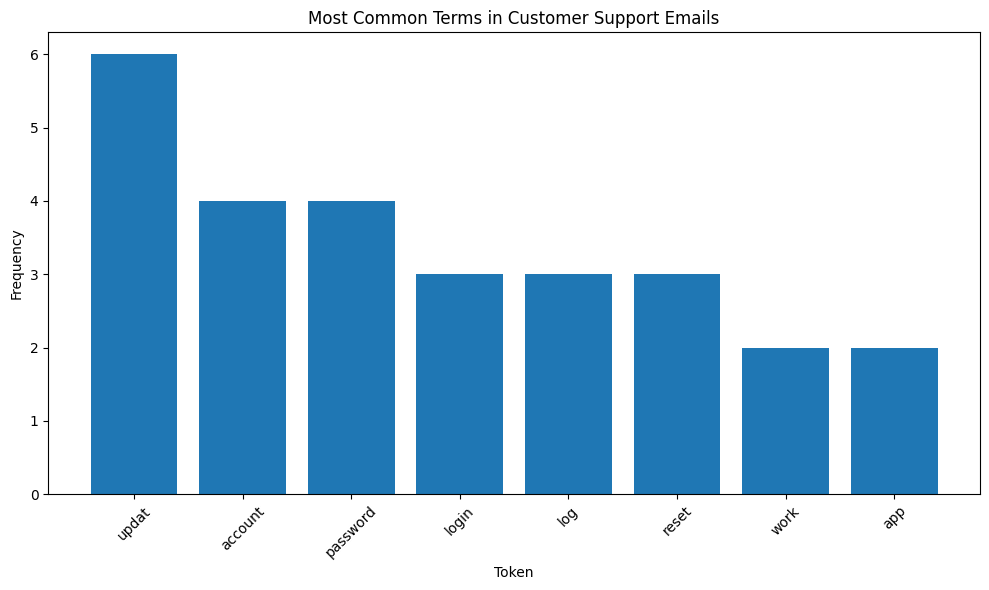

In [1]:
import re
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

# Download required NLTK data (only needed once)
nltk.download('stopwords')

# Sample customer support emails
sample_emails = [
    "My account login isn't working after the update",
    "I can't log into my account since the latest update",
    "The app keeps crashing when I try to reset my password",
    "After updating, the login screen freezes when I enter my password",
    "My account balance is not showing correctly after logging in",
    "The password reset link in my email doesn't work",
    "I'm having trouble logging in with the new update",
    "The app crashes every time I try to access account settings",
    "Can't verify my identity when attempting to login after update",
    "The new update is great but I can't reset my password now"
]

# Create a DataFrame
df = pd.DataFrame({'email_text': sample_emails})

# Function to tokenize and clean text
def tokenize_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and replace with space
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    
    # Tokenize (split into words)
    tokens = text.split()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming (reducing words to their root form)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens

# Apply tokenization to emails
df['tokens'] = df['email_text'].apply(tokenize_text)

# Count all tokens
all_tokens = []
for token_list in df['tokens']:
    all_tokens.extend(token_list)

token_counts = Counter(all_tokens)

print("Top 10 tokens in customer emails:")
for token, count in token_counts.most_common(10):
    print(f"{token}: {count}")

# Find co-occurrences of specific terms
def find_cooccurrence(token1, token2, token_lists):
    count = 0
    for tokens in token_lists:
        if token1 in tokens and token2 in tokens:
            count += 1
    return count

# Check some meaningful co-occurrences
login_update = find_cooccurrence('login', 'updat', df['tokens'])
password_reset = find_cooccurrence('password', 'reset', df['tokens'])

print(f"\nEmail count: {len(df)}")
print(f"'login' and 'update' appear together in {login_update} emails ({login_update/len(df)*100:.1f}%)")
print(f"'password' and 'reset' appear together in {password_reset} emails ({password_reset/len(df)*100:.1f}%)")

# Visualize the top tokens
plt.figure(figsize=(10, 6))
common_tokens = dict(token_counts.most_common(8))
plt.bar(common_tokens.keys(), common_tokens.values())
plt.title('Most Common Terms in Customer Support Emails')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('token_frequency.png')
print("\nToken frequency visualization saved as 'token_frequency.png'")

# Basic issue categorization
def categorize_issue(tokens):
    categories = {
        'login_issues': ['login', 'log', 'account'],
        'password_issues': ['password', 'reset'],
        'app_performance': ['crash', 'freez', 'slow'],
        'display_issues': ['show', 'display', 'balanc']
    }
    
    result = {}
    for category, category_tokens in categories.items():
        if any(token in tokens for token in category_tokens):
            result[category] = True
        else:
            result[category] = False
    return result

# Apply categorization
categories_df = pd.DataFrame(df['tokens'].apply(categorize_issue).tolist())
df = pd.concat([df, categories_df], axis=1)

# Count issues by category
category_counts = categories_df.sum()
print("\nIssue counts by category:")
for category, count in category_counts.items():
    print(f"{category}: {count} ({count/len(df)*100:.1f}%)")

### More NLP Techniques

**4. Part-of-speech (POS) tagging**: Identifying whether words are nouns, verbs, adjectives, etc.
   - "The quick brown fox jumps" → [Determiner, Adjective, Adjective, Noun, Verb]
   - Critical for understanding grammatical structure and word meaning in context

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307307-BI-Methods-LLMs/main/lecture%20notes/images/POS-tagging.jpg" alt="Text Tokenization" width="600"/>    
</div>

#### Penn Treebank POS Tags (commonly used in NLTK and other NLP tools)

a. **Nouns**
   - NN: Noun, singular (book, cat)
   - NNS: Noun, plural (books, cats)
   - NNP: Proper noun, singular (John, London)
   - NNPS: Proper noun, plural (Americans, Alps)

b. **Verbs**
   - VB: Verb, base form (take)
   - VBD: Verb, past tense (took)
   - VBG: Verb, gerund/present participle (taking)
   - VBN: Verb, past participle (taken)
   - VBP: Verb, non-3rd person singular present (take)
   - VBZ: Verb, 3rd person singular present (takes)

c. **Adjectives**
   - JJ: Adjective (big)
   - JJR: Adjective, comparative (bigger)
   - JJS: Adjective, superlative (biggest)

d. **Adverbs**
   - RB: Adverb (quickly, not)
   - RBR: Adverb, comparative (faster)
   - RBS: Adverb, superlative (fastest)

e. **Pronouns**
   - PRP: Personal pronoun (I, you, he)
   - PRP$: Possessive pronoun (my, your)

f. **Determiners**
   - DT: Determiner (the, a, these)
   - WDT: Wh-determiner (which, that)

g. **Prepositions**
   - IN: Preposition or subordinating conjunction (in, of, like)

h. **Conjunctions**
   - CC: Coordinating conjunction (and, but, or)

h. **Particles**
   - RP: Particle (up, off)

i. **Other Common Tags**
    - CD: Cardinal number (one, two)
    - MD: Modal (can, should)
    - TO: to
    - WRB: Wh-adverb (where, when)
    - UH: Interjection (oh, wow)
    - FW: Foreign word
    - SYM: Symbol
    - .: Period
    - ,: Comma
    - :: Colon

These tags are used in most POS tagging systems, though some variations exist between different NLP libraries and annotation schemes.

**Real-world application:** E-commerce companies use POS tagging to automatically extract product features (nouns) and associated sentiments (adjectives) from thousands of reviews, helping product teams prioritize improvements.

In [ ]:
import nltk
from nltk import pos_tag, word_tokenize

# Download the required NLTK resources
nltk.download('punkt')  # Tokenizer
nltk.download('averaged_perceptron_tagger_eng')  # POS tagger 


# Sample product review
review = "This smartphone has an amazing camera but the battery life is terrible."

# Tokenize and perform POS tagging
tokens = word_tokenize(review)
tagged = pos_tag(tokens)

print("POS Tagged Review:")
print(tagged)

# Extract adjectives which often indicate product qualities
adjectives = []
for word, tag in tagged:
    if tag.startswith('JJ'):
        adjectives.append(word)
print(f"\nProduct qualities (adjectives): {adjectives}")

# Extract nouns which often indicate product features
nouns = []
for word, tag in tagged:
    if tag.startswith('NN'):
        nouns.append(word)
print(f"Product features (nouns): {nouns}")

[nltk_data] Downloading package punkt to /home/me/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/me/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

**5. Parsing**: Analyzing grammatical structure of sentences
   - Constituency parsing: Constructing phrase structure trees
   - Dependency parsing: Identifying grammatical relationships between words
   - Semantic parsing: Mapping sentences to formal meaning representations

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307307-BI-Methods-LLMs/main/lecture%20notes/images/parsing.png" alt="Text Tokenization" width="600"/>    
</div>

**Real-world application:** Grammar checking software like Grammarly uses syntactic parsing to identify and correct grammatical errors in real-time, helping millions of users improve their writing.

First, we donwload the required libraries

In [11]:
! pip install spacy
! python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.8/31.8 MB 19.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.6/138.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 19.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 20.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 21.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [10]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

# Sample sentence with subject-verb agreement error
incorrect = "The students in my class has finished their exams."
correct = "The students in my class have finished their exams."

# Parse both sentences
doc_incorrect = nlp(incorrect)
doc_correct = nlp(correct)

# Function to check subject-verb agreement
def check_subject_verb_agreement(doc):
    for token in doc:
        # Find main verbs
        if token.pos_ == "VERB" and token.dep_ == "ROOT":
            # Find the subject
            subjects = [subj for subj in token.children if subj.dep_ == "nsubj"]
            if subjects:
                subject = subjects[0]
                print(f"Subject: '{subject.text}' ({subject.tag_}) | Verb: '{token.text}' ({token.tag_})")
                # Check if plural subject has plural verb form
                if subject.tag_ == "NNS" and token.tag_ not in ["VBP", "VB"]:
                    print(f"AGREEMENT ERROR: Plural subject with singular verb")
                elif subject.tag_ == "NN" and token.tag_ == "VBP":
                    print(f"AGREEMENT ERROR: Singular subject with plural verb")
                else:
                    print("Subject-verb agreement is correct")

print("Analyzing incorrect sentence:")
check_subject_verb_agreement(doc_incorrect)

print("\nAnalyzing correct sentence:")
check_subject_verb_agreement(doc_correct)

/home/me/myenv/lib/python3.12/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Analyzing incorrect sentence:
Subject: 'students' (NNS) | Verb: 'finished' (VBN)
AGREEMENT ERROR: Plural subject with singular verb

Analyzing correct sentence:
Subject: 'students' (NNS) | Verb: 'finished' (VBN)
AGREEMENT ERROR: Plural subject with singular verb


**5. Stemming vs. Lemmatization in NLP**

Stemming and lemmatization are text normalization techniques used in Natural Language Processing (NLP) to reduce words to their base or root forms. They help in improving search engines, text mining, and language modeling by standardizing words with similar meanings.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307307-BI-Methods-LLMs/main/lecture%20notes/images/stemming_lemmatization.png" alt="Text Tokenization" width="600"/>    
</div>

**i. Stemming**
**Definition**: Stemming is a rule-based process that removes prefixes and suffixes (affixes) from a word to obtain its base form, often producing words that may not be actual words.

- **Method**: Uses algorithms like **Porter Stemmer** and **Snowball Stemmer**.
- **Example**:
  - "Running" → "Run"
  - "Studies" → "Studi"
  - "Better" → "Better" (Incorrectly unchanged)
  - "Caring" → "Car"
  
- **Limitations**:
  - Often results in words that are not real words ("Studies" → "Studi").
  - Does not consider the actual meaning of words.

**ii. Lemmatization**
**Definition**: Lemmatization is a dictionary-based approach that reduces words to their meaningful root form (lemma), considering the word's context and part of speech.

- **Method**: Uses linguistic analysis and dictionaries (like WordNet Lemmatizer).
- **Example**:
  - "Running" → "Run"
  - "Studies" → "Study"
  - "Better" → "Good" (Correct Lemma)
  - "Caring" → "Care"
  
- **Advantages**:
  - More accurate than stemming.
  - Produces real words with proper meanings.
  
**Key Differences**
| Feature | Stemming | Lemmatization |
|---------|---------|--------------|
| **Approach** | Rule-based | Dictionary-based |
| **Speed** | Faster | Slower |
| **Accuracy** | Less accurate | More accurate |
| **Example** | "Caring" → "Car" | "Caring" → "Care" |

**Use Case**:  
- **Stemming** is useful when **speed** is more important than accuracy (e.g., search engines).  
- **Lemmatization** is better for **semantic analysis** where meaning matters (e.g., AI chatbots, NLP applications).

**Real-world application:** Search engines use stemming and lemmatization to match user queries with relevant content even when the exact words don't match. SEO tools help content creators optimize for variants of keywords.

In [16]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

# Set of related query variants
search_queries = [
    "running shoes for marathon",
    "runner shoes for marathons",
    "shoes for marathon runners",
    "best shoes to run marathons"
]

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Process each query
for query in search_queries:
    tokens = query.lower().split()
    
    # Apply stemming
    stemmed = [stemmer.stem(token) for token in tokens]
    
    # Apply lemmatization
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    
    print(f"Original: {query}")
    print(f"Stemmed: {' '.join(stemmed)}")
    print(f"Lemmatized: {' '.join(lemmatized)}\n")

# Keyword grouping based on stems
stem_to_queries = {}
for query in search_queries:
    # Create a query signature using stems
    tokens = query.lower().split()
    stemmed = [stemmer.stem(token) for token in tokens]
    signature = " ".join(sorted(set(stemmed)))
    
    if signature not in stem_to_queries:
        stem_to_queries[signature] = []
    stem_to_queries[signature].append(query)

print("Query groups based on stemmed keywords:")
for signature, queries in stem_to_queries.items():
    print(f"Group: {signature}")
    print(f"Queries: {queries}\n")

[nltk_data] Downloading package wordnet to /home/me/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original: running shoes for marathon
Stemmed: run shoe for marathon
Lemmatized: running shoe for marathon

Original: runner shoes for marathons
Stemmed: runner shoe for marathon
Lemmatized: runner shoe for marathon

Original: shoes for marathon runners
Stemmed: shoe for marathon runner
Lemmatized: shoe for marathon runner

Original: best shoes to run marathons
Stemmed: best shoe to run marathon
Lemmatized: best shoe to run marathon

Query groups based on stemmed keywords:
Group: for marathon run shoe
Queries: ['running shoes for marathon']

Group: for marathon runner shoe
Queries: ['runner shoes for marathons', 'shoes for marathon runners']

Group: best marathon run shoe to
Queries: ['best shoes to run marathons']




**6. Named Entity Recognition (NER)**: Identifying proper nouns like people, organizations, locations
   - "Apple is releasing a new iPhone in San Francisco" → [Organization, Product, Location]
   - Useful for extracting key information from unstructured text

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307307-BI-Methods-LLMs/main/lecture%20notes/images/ner.png" alt="Text Tokenization" width="600"/>    
</div>

**Real-world application:** Media monitoring companies use NER to track mentions of clients, competitors, and industry trends across thousands of news sources, enabling real-time alerts and competitive intelligence.

In [13]:
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

# Sample news article snippet
news_text = "Apple Inc. is planning to open a new campus in Austin, Texas by 2025. CEO Tim Cook announced the $1 billion investment yesterday."

# Process the text
doc = nlp(news_text)

# Extract and categorize named entities
entities = {
    "Organizations": [],
    "Persons": [],
    "Locations": [],
    "Dates": [],
    "Money": []
}

for ent in doc.ents:
    if ent.label_ == "ORG":
        entities["Organizations"].append(ent.text)
    elif ent.label_ == "PERSON":
        entities["Persons"].append(ent.text)
    elif ent.label_ == "GPE" or ent.label_ == "LOC":
        entities["Locations"].append(ent.text)
    elif ent.label_ == "DATE":
        entities["Dates"].append(ent.text)
    elif ent.label_ == "MONEY":
        entities["Money"].append(ent.text)

print("Extracted Named Entities:")
for category, items in entities.items():
    print(f"{category}: {', '.join(items)}")

Extracted Named Entities:
Organizations: Apple Inc.
Persons: Tim Cook
Locations: Austin, Texas
Dates: 2025, yesterday
Money: $1 billion


**7. Coreference resolution**: Determining when different words refer to the same entity
   - "John said he was tired" → "he" refers to "John"
   - Essential for understanding relationships across sentences

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307307-BI-Methods-LLMs/main/lecture%20notes/images/coreference.png" alt="Text Tokenization" width="600"/>    
</div>

**Real-world application:** Automated customer service systems use coreference resolution to track what "it" refers to throughout a conversation, enabling more natural interactions and accurate information extraction for ticketing systems.

---

## Representing Text: Bag of Words and TF-IDF

### Bag of Words (BoW)

A simple way to represent text as numerical vectors by counting word occurrences:

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "Large language models revolutionize business.",
    "Business applications benefit from AI.",
    "Language models learn from text data."
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
# Output: ['ai', 'applications', 'benefit', 'business', 'data', 'from', 'language', 'large', 'learn', 'models', 'revolutionize', 'text']

print(X.toarray())
# Output: 
# [[0 0 0 1 0 0 1 1 0 1 1 0]
#  [1 1 1 1 0 1 0 0 0 0 0 0]
#  [0 0 0 0 1 1 1 0 1 1 0 1]]

['ai' 'applications' 'benefit' 'business' 'data' 'from' 'language' 'large'
 'learn' 'models' 'revolutionize' 'text']
[[0 0 0 1 0 0 1 1 0 1 1 0]
 [1 1 1 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 1 1 0 1]]


**Real-world Application:** A human resources department can use Bag of Words to automatically categorize job applications. By converting resumes to BoW vectors, the system can identify which candidates mention key skills like "Python", "machine learning", or "project management", enabling faster screening of large applicant pools.


### Term Frequency-Inverse Document Frequency (TF-IDF)

A more sophisticated approach that weights terms based on their importance:

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)
print(tfidf_vectorizer.get_feature_names_out())
# Same output as above

print(X_tfidf.toarray())
# Output will be a matrix of TF-IDF scores

['ai' 'applications' 'benefit' 'business' 'data' 'from' 'language' 'large'
 'learn' 'models' 'revolutionize' 'text']
[[0.         0.         0.         0.3935112  0.         0.
  0.3935112  0.51741994 0.         0.3935112  0.51741994 0.        ]
 [0.49047908 0.49047908 0.49047908 0.37302199 0.         0.37302199
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.45954803 0.34949812
  0.34949812 0.         0.45954803 0.34949812 0.         0.45954803]]


**Real-world Application:** News recommendation systems use TF-IDF to identify distinctive topics in articles. When a reader shows interest in technology articles, the system can recommend other articles with similar TF-IDF profiles, focusing on meaningful terms like "blockchain" or "artificial intelligence" rather than common words like "said" or "reported".

---

## Classical Language Models: N-grams

N-gram models were among the earliest statistical language models, predicting the probability of a sequence of words by analyzing patterns in training data.

### What are N-grams?

N-grams are contiguous sequences of n items (words, characters, etc.) from a text:
- **Unigrams**: Single words (e.g., "language")
- **Bigrams**: Two consecutive words (e.g., "language models")
- **Trigrams**: Three consecutive words (e.g., "large language models")

### Implementing N-grams

In [30]:
from nltk.util import ngrams

text = "Large language models are transforming how businesses operate"
tokens = word_tokenize(text.lower())

# Generate bigrams
bigrams_list = list(ngrams(tokens, 2))
print(bigrams_list)
# Output: [('large', 'language'), ('language', 'models'), ('models', 'are'), ('are', 'transforming'), ('transforming', 'how'), ('how', 'businesses'), ('businesses', 'operate')]

# Generate trigrams
trigrams_list = list(ngrams(tokens, 3))
print(trigrams_list)
# Output: [('large', 'language', 'models'), ('language', 'models', 'are'), ('models', 'are', 'transforming'), ('are', 'transforming', 'how'), ('transforming', 'how', 'businesses'), ('how', 'businesses', 'operate')]

[('large', 'language'), ('language', 'models'), ('models', 'are'), ('are', 'transforming'), ('transforming', 'how'), ('how', 'businesses'), ('businesses', 'operate')]
[('large', 'language', 'models'), ('language', 'models', 'are'), ('models', 'are', 'transforming'), ('are', 'transforming', 'how'), ('transforming', 'how', 'businesses'), ('how', 'businesses', 'operate')]


### Building a Simple N-gram Language Model

In [26]:
import random
from collections import defaultdict

def build_ngram_model(text, n=2):
    """Build an n-gram language model from text."""
    tokens = word_tokenize(text.lower())
    ngrams_dict = defaultdict(list)
    
    # Create dictionary of n-grams and possible next words
    for i in range(len(tokens) - n):
        current_ngram = tuple(tokens[i:i+n])
        next_word = tokens[i+n]
        ngrams_dict[current_ngram].append(next_word)
    
    return ngrams_dict

def generate_text(model, seed, length=20):
    """Generate text using the n-gram model."""
    current = seed
    result = list(seed)
    
    for _ in range(length):
        if current in model:
            # Randomly select a possible next word
            next_word = random.choice(model[current])
            result.append(next_word)
            # Update current n-gram
            current = current[1:] + (next_word,)
        else:
            # If current n-gram is not in model, break
            break
    
    return ' '.join(result)

# Sample text corpus
corpus = """Large language models are transforming how businesses operate. 
These models can understand language, generate text, and perform various tasks. 
Businesses use language models for customer service, content creation, and data analysis.
Language models learn patterns from vast amounts of text data."""

# Build a bigram model
bigram_model = build_ngram_model(corpus, 2)

# Generate text using the model
seed = ('language', 'models')
generated_text = generate_text(bigram_model, seed)
print(generated_text)
# Output might be: "language models learn patterns from vast amounts of text data businesses use language models for customer service content creation and data analysis"

language models for customer service , content creation , and data analysis . language models for customer service , content creation ,


### Limitations of N-gram Models

1. **Limited context**: Only consider a fixed number of previous words
2. **Data sparsity**: Many valid word combinations don't appear in training data
3. **No semantic understanding**: Model captures statistical patterns but not meaning
4. **Memory intensive**: Storing all possible n-grams requires significant space
5. **No long-range dependencies**: Cannot capture relationships between distant words

---

## Smoothing Techniques

To address data sparsity in n-gram models, smoothing techniques redistribute probability mass to unseen events:

### Laplace (Add-One) Smoothin

In [27]:
def build_bigram_model_with_smoothing(text):
    """Build a bigram model with Laplace smoothing."""
    tokens = word_tokenize(text.lower())
    # Count word frequencies
    unigram_counts = defaultdict(int)
    bigram_counts = defaultdict(int)
    
    for i in range(len(tokens)):
        unigram_counts[tokens[i]] += 1
        if i < len(tokens) - 1:
            bigram = (tokens[i], tokens[i+1])
            bigram_counts[bigram] += 1
    
    # Calculate probabilities with smoothing
    vocab_size = len(unigram_counts)
    bigram_model = {}
    
    for bigram, count in bigram_counts.items():
        # P(w2|w1) = (count(w1,w2) + 1) / (count(w1) + V)
        w1 = bigram[0]
        bigram_model[bigram] = (count + 1) / (unigram_counts[w1] + vocab_size)
    
    return bigram_model, unigram_counts, vocab_size

# Build model with smoothing
model, unigram_counts, vocab_size = build_bigram_model_with_smoothing(corpus)

# Calculate probability of a bigram
def get_bigram_probability(model, unigram_counts, vocab_size, w1, w2):
    """Get the probability of a bigram with smoothing."""
    if (w1, w2) in model:
        return model[(w1, w2)]
    else:
        # For unseen bigrams
        return 1 / (unigram_counts[w1] + vocab_size)

# Example probability
prob = get_bigram_probability(model, unigram_counts, vocab_size, 'language', 'models')
print(f"P(models|language) = {prob:.4f}")

P(models|language) = 0.1081


---

## Evaluating Language Models: Perplexity
Perplexity measures how well a language model predicts a sample:

In [28]:
import numpy as np

def calculate_perplexity(test_text, model, unigram_counts, vocab_size):
    """Calculate perplexity of test text using the bigram model."""
    tokens = word_tokenize(test_text.lower())
    log_probability = 0
    
    for i in range(len(tokens) - 1):
        bigram = (tokens[i], tokens[i+1])
        probability = get_bigram_probability(model, unigram_counts, vocab_size, tokens[i], tokens[i+1])
        log_probability += np.log2(probability)
    
    # Perplexity = 2^(-average log probability)
    perplexity = 2 ** (-log_probability / (len(tokens) - 1))
    return perplexity

# Test the model on new text
test_text = "Language models help businesses understand customer feedback."
perplexity = calculate_perplexity(test_text, model, unigram_counts, vocab_size)
print(f"Perplexity: {perplexity:.2f}")

Perplexity: 28.45


---

## Conclusion

In this lecture, we've explored the foundations of NLP and classical language models, particularly focusing on n-gram models. While these approaches have significant limitations, they introduced important concepts that laid the groundwork for more advanced language models.

In the next lecture, we'll examine the transition from statistical models to neural network-based approaches, including word embeddings and recurrent neural networks, which addressed many of the limitations of classical models.

## Discussion Questions

1. How might a business use basic NLP techniques like tokenization and sentiment analysis to gain insights from customer feedback?
2. What are the key limitations of the bag-of-words approach for representing text?
3. How could n-gram models be used in predictive text applications, and what challenges might arise?
4. Why is context so important in language understanding, and how do classical models struggle with this?

## Practical Assignment

Implement a simple text classifier using the bag-of-words model and TF-IDF to categorize customer feedback as positive, negative, or neutral. Compare the performance of these two text representation approaches.

---

## غير مطلوب - مطالعة ذاتية
## Additional Language Challenges

- **Context-dependent**: Meaning often depends on surrounding text or real-world knowledge
  - **Lexical context**: The meaning of words depends on surrounding words
    - Example: In "She took the bat to the game" vs. "The bat flew into the cave," the meaning of "bat" changes completely
    - Example: "He was drawing a bow" (musical instrument or weapon?) depends on previous sentences
    - Example: "She went to the bank" (financial institution or riverbank?) requires surrounding context
    - Computational challenge: Models must use nearby words to disambiguate meanings
  
  - **Discourse context**: The meaning depends on previous statements or conversation history
    - Example: "She likes it" is meaningless without knowing what "it" refers to
    - Example: "That's not what I meant" requires understanding previous utterances
    - Example: "This solution addresses the problem" needs context about what problem is being discussed
    - Computational challenge: Systems must track reference and topics across multiple sentences
  
  - **Domain knowledge**: The meaning requires specific background knowledge
    - Example: Understanding "He scored a perfect 300" requires knowing if we're discussing bowling, SAT testing, or something else
    - Example: "The patient presents with elevated troponin levels" requires medical knowledge
    - Example: "The forward executed a perfect pick and roll" requires basketball knowledge
    - Computational challenge: Models need domain-specific training or specialized knowledge bases
  
  - **World knowledge**: The meaning requires general understanding about how the world works
    - Example: "The coffee is too hot to drink" implies waiting, while "The coffee is too cold to drink" might imply reheating
    - Example: "She couldn't fit the trophy in the suitcase because it was too big" (what was too big? requires understanding size relationships)
    - Example: "The child couldn't reach the cookie jar on the shelf" requires understanding physical capabilities
    - Computational challenge: Models need broad common-sense reasoning capabilities

- **Evolving**: Language changes over time with new words and usage patterns
  - **Neologisms**: Creation of entirely new words
    - Example: "Doomscrolling," "NFT," "cryptocurrency," and "webinar" emerged in recent years
    - Example: "Unfriend," "selfie," and "binge-watch" entered dictionaries in the past decade
    - Example: Technology terms like "blog," "podcast," and "smartphone" that didn't exist 30 years ago
    - Computational challenge: Models trained on older corpora lack these terms in their vocabulary
  
  - **Semantic shifts**: Existing words gaining new meanings
    - Example: "Cloud" shifted from weather phenomenon to data storage
    - Example: "Tweet" evolved from bird sound to social media post
    - Example: "Viral" changed from referring to viruses to popular online content
    - Computational challenge: Models must distinguish between traditional and newer meanings
  
  - **Functional shifts**: Words changing their grammatical roles
    - Example: "Google" evolved from a proper noun to a verb ("Let me google that")
    - Example: "Adult" transformed from adjective/noun to verb ("I can't adult today")
    - Example: "Friend" changed from noun to verb ("Friend me on Facebook")
    - Computational challenge: Part-of-speech tagging systems must accommodate these changes
  
  - **Semantic broadening/narrowing**: Words expanding or restricting their meaning
    - Example: "Sick" expanded from purely negative (ill) to also positive (excellent)
    - Example: "Literally" broadened to be used for emphasis, not just "exactly as stated"
    - Example: "Gay" narrowed from "happy" to specifically referring to homosexuality
    - Computational challenge: Systems must understand both historical and contemporary usage

- **Culturally influenced**: Idioms, slang, and references vary across cultures
  - **Idioms**: Expressions whose meanings cannot be derived from their individual words
    - Example: "Break a leg" is encouragement in Western theater, not a violent wish
    - Example: "It's raining cats and dogs" means heavy rainfall, not animals falling from the sky
    - Example: "Kick the bucket" refers to dying, not striking a container with one's foot
    - Computational challenge: Systems must learn thousands of idiomatic expressions as special cases
  
  - **Regional variations**: Differences in vocabulary and usage across regions
    - Example: American English "elevator" vs. British English "lift"
    - Example: American English "first floor" is ground level, while in British English it's one level up
    - Example: "Table a discussion" means to postpone it in American English but to bring it forward in British English
    - Computational challenge: Models must recognize dialect and adjust interpretation accordingly
  
  - **Cultural references**: Meanings that depend on shared cultural knowledge
    - Example: Understanding "May the Fourth be with you" requires familiarity with Star Wars
    - Example: "Don't cross the streams" is advice about avoiding disaster (from Ghostbusters)
    - Example: "Winter is coming" may convey a sense of foreboding (from Game of Thrones)
    - Computational challenge: Systems need massive cultural knowledge bases or must identify references
  
  - **Slang and colloquialisms**: Informal language that varies by social group and generation
    - Example: "That's sick" meaning impressive or excellent among younger generations
    - Example: "Throwing shade" meaning subtle criticism or disrespect
    - Example: "Ghost" as a verb meaning to suddenly cut off communication
    - Computational challenge: Slang evolves rapidly and varies widely across demographics

- **Structurally complex**: Grammar, syntax, and semantics interact in sophisticated ways
  - **Syntactic complexity**: Sentences with intricate grammatical structures
    - Example: Garden path sentences that mislead the reader: "The old man the boat" (where "man" is a verb)
    - Example: "The horse raced past the barn fell" (The horse that was raced past the barn fell)
    - Example: Complex embeddings: "The rat the cat the dog chased killed ate the cheese"
    - Computational challenge: Parsing requires handling multiple possible grammatical interpretations
  
  - **Anaphora resolution**: Determining what pronouns and references point to
    - Example: "John told Bill that he had won the lottery" (Who won? John or Bill?)
    - Example: "The trophy wouldn't fit in the suitcase because it was too big" (What was too big?)
    - Example: "After the doctors treated the patients, they went home" (Who went home?)
    - Computational challenge: Systems must identify the correct antecedent among multiple candidates
  
  - **Scope ambiguity**: Uncertainty about which parts of a sentence are affected by operators like negation
    - Example: "I did not go to the store because it was closed" (Did I go to the store? The reason is ambiguous)
    - Example: "All students read one book" (One specific book read by all, or different books for each student?)
    - Example: "She only likes blue shirts" (Only likes blue shirts and nothing else? Or likes blue shirts but no other colors?)
    - Computational challenge: Models must determine the intended scope of quantifiers and operators
  
  - **Long-distance dependencies**: Relationships between words that are far apart in a sentence
    - Example: "The document that the lawyer who the firm hired prepared was reviewed"
    - Example: "What did you say you wanted to buy?" (connecting "what" with "buy")
    - Example: "This is the house that Jack built that the malt lay in that the rat ate..."
    - Computational challenge: Systems must track relationships across many intervening words

